# Dataset Class

In [7]:
import torch

from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from  Dataset.visualize_keypoint import *
from src.dataload import *
import warnings
warnings.filterwarnings("ignore")

2007_000063.jpg
[[193, 216, 1], [160, 217, 1], [174, 261, 1], [204, 186, 1], [152, 182, 1], [0, 0, 0], [0, 0, 0], [273, 168, 1], [0, 0, 0], [0, 0, 0], [0, 0, 0], [266, 225, 1], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [190, 145, 1], [351, 238, 1]]


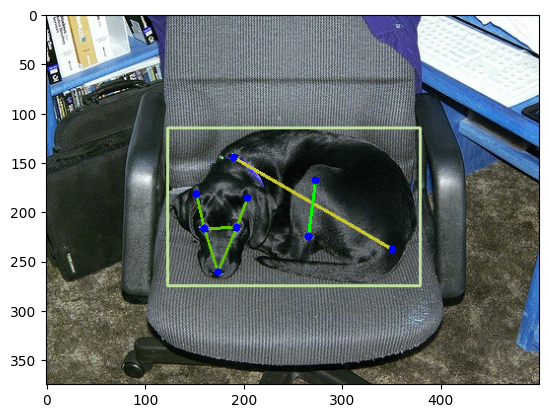

In [26]:
class AnimalPoseDataset(Dataset):
    """ Animal 2D pose estimation dataset"""

    def __init__ (self, json_file, root_dir, transform=None):
        """
        Args:
            json_file (string): Path to the json file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.keypoints_frame = json.load(open(json_file))
        self.root_dir = root_dir
        self.transform = transform
    
    def __len__(self):
        return len(self.keypoints_frame)
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        anno_dict = self.keypoints_frame
        image_map = anno_dict["images"]
        annotations = anno_dict["annotations"]
        

        imagename = image_map[str(annotations[idx]["image_id"])]
        bbox = annotations[idx]["bbox"]
        keypoints = annotations[idx]["keypoints"]
        image_path = os.path.join(self.root_dir, imagename)
        image = cv2.imread(image_path)
        image = draw_bbox(image, bbox[0], bbox[1], bbox[2], bbox[3], random_color())
        image = draw_keypoint(image, keypoints)
        
        print(imagename)        

        sample = {'image': image, 'keypoints': keypoints}
        
        return sample
    
dataset = AnimalPoseDataset(json_file='Dataset/keypoints.json', 
                            root_dir='Dataset/images/')

data = dataset.__getitem__(0)
# show the image

plt.imshow(data['image'])
print(data['keypoints'])
plt.show()